In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import glob
import os
%matplotlib inline

In [74]:
os.getcwd()

'/Users/annalisasheehan/Documents/PhD/Costa Rica/Arduino_Data'

## Read in PM dataset which contains calibration data 

In [3]:
Arduino2 = pd.read_csv("After Calibration/cr_sensor_2_calib.txt",delimiter=',', 
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds', 'PM1', 'PM2.5', 'PM10', 
                              'Temp', 'Pressure', 'Humidity', 'VOC'],)

In [4]:
Arduino2

,Year,Month,Day,Hour,Minute,Seconds,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
0,2019,3,11,10,59,48,0,0,0,22.84,1025.46,27.46,0.00
1,2019,3,11,11,0,15,0,1,1,23.09,1025.52,29.30,0.00
2,2019,3,11,11,0,21,0,1,1,23.12,1025.50,30.93,78.11
3,2019,3,11,11,0,26,0,2,2,23.18,1025.80,32.11,83.73
4,2019,3,11,11,0,31,0,2,2,23.26,1025.74,32.51,88.13
5,2019,3,11,11,0,37,0,1,1,23.36,1025.68,31.66,92.92
6,2019,3,11,11,0,42,0,0,0,23.46,1025.52,30.25,95.17
7,2019,3,11,11,0,47,0,0,0,23.55,1025.52,29.89,96.15
8,2019,3,11,11,0,52,0,0,0,23.63,1025.48,29.95,96.26
9,2019,3,11,11,0,57,0,0,0,23.71,1025.50,30.07,94.63


In [68]:
Arduino2[Arduino2.Month == 4]

,Year,Month,Day,Hour,Minute,Seconds,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
37095,2019,4,10,9,15,44,7,12,16,12.25,1017.20,48.49,0.00
37096,2019,4,10,9,15,49,8,13,15,12.24,1017.20,48.95,3.21
37097,2019,4,10,9,15,55,8,13,18,12.23,1017.18,49.29,4.14
37098,2019,4,10,9,16,0,7,14,17,12.21,1017.18,49.52,5.17
37099,2019,4,10,9,16,5,6,12,15,12.17,1017.18,49.69,6.21
37100,2019,4,10,9,16,10,6,10,15,12.10,1017.18,49.81,7.37
37101,2019,4,10,9,16,16,5,8,8,12.01,1017.22,49.92,8.48
37102,2019,4,10,9,16,21,5,8,8,11.94,1017.22,50.14,9.68
37103,2019,4,10,9,16,26,7,9,9,11.88,1017.26,50.41,10.89
37104,2019,4,10,9,16,31,8,11,11,11.80,1017.24,50.60,12.10


In [5]:
A2_mean = Arduino2.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [42]:
A2_mean

,Year,Month,Day,Hour,Minute,Seconds,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,A2_Humidity,A2_VOC,Datetime
0,1919,1,4,12,28.000000,23.000000,8.000000,10.000000,11.000000,17.950000,8.888700e+02,82.760000,74.360000,1919-01-04 12:28:00
1,2019,3,11,10,59.000000,48.000000,0.000000,0.000000,0.000000,22.840000,1.025460e+03,27.460000,0.000000,2019-03-11 10:59:00
2,2019,3,11,11,10.633858,29.846457,0.047244,0.118110,0.181102,23.763465,1.025607e+03,27.226890,138.434528,2019-03-11 11:10:38
3,2019,3,13,13,39.109705,29.801688,2.278481,3.149789,3.510549,28.142300,9.831695e+02,40.656224,87.516582,2019-03-13 13:39:06
4,2019,3,13,14,29.168869,29.437592,6.878120,16.644640,22.367107,30.501028,9.978164e+02,38.077621,92.006490,2019-03-13 14:29:10
5,2019,3,13,15,30.530139,29.511592,14.454405,32.870170,44.374034,31.872751,1.006972e+03,40.073895,90.952968,2019-03-13 15:30:31
6,2019,3,13,16,29.510917,29.243086,10.857351,19.885007,24.700146,33.010233,1.007950e+03,56.177700,103.603697,2019-03-13 16:29:30
7,2019,3,13,17,29.477504,29.571843,10.169811,18.741655,23.121916,33.356299,1.007098e+03,55.913672,108.676952,2019-03-13 17:29:28
8,2019,3,13,18,29.595960,29.428571,7.906205,13.642136,16.391053,34.109928,1.006348e+03,56.968788,102.015354,2019-03-13 18:29:35
9,2019,3,13,19,29.500000,29.694444,17.555556,40.410819,55.004386,28.447149,9.993078e+02,47.553129,103.173099,2019-03-13 19:29:30


In [7]:
A2_mean = A2_mean.rename(columns={'PM1':'A2_PM1','PM2.5':'A2_PM2.5',
                                  'PM10':'A2_PM10','Temp':'A2_Temp',
                                  'Pressure':'A2_Pressure','Humidity':'A2_Humidity',
                                  'VOC':'A2_VOC'})

In [41]:
A2_mean['Datetime']  = (pd.to_datetime(A2_mean['Year'].astype(str) + '-' +
                                       A2_mean['Month'].astype(str) + '-' +
                                       A2_mean['Day'].astype(str) + ' ' +
                                       A2_mean['Hour'].astype(str)+ ':'+ 
                                       A2_mean['Minute'].astype(str), errors='coerce'))

## Read in data which stopped working on the 16/3/2019

In [8]:
Arduino3_p = pd.read_csv("cr_sensor_03.csv")

In [8]:
#Arduino3_p = pd.read_csv('cr_sensor_03.csv',delimiter=',',
                #        names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','PM1','PM2.5','PM10'])

In [9]:
Arduino3_p

,Year,date.time,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10
0,2019,16/03/2019 04:09,3,16,4,9,17,0,0,0
1,2019,16/03/2019 04:09,3,16,4,9,23,0,0,0
2,2019,16/03/2019 04:09,3,16,4,9,30,0,0,0
3,2019,16/03/2019 04:09,3,16,4,9,36,0,0,0
4,2019,16/03/2019 04:09,3,16,4,9,42,0,0,0
5,2019,16/03/2019 04:09,3,16,4,9,48,0,0,0
6,2019,16/03/2019 04:09,3,16,4,9,54,7,10,10
7,2019,16/03/2019 04:09,3,16,4,9,59,7,11,12
8,2019,16/03/2019 04:10,3,16,4,10,5,7,12,13
9,2019,16/03/2019 04:10,3,16,4,10,10,7,13,14


In [10]:
A3_mean = Arduino3_p.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [44]:
A3_mean

,Year,Month,Day,Hour,Minute,Second,A3_PM1,A3_PM2.5,A3_PM10,Datetime
0,2019,3,16,4,11.020833,30.520833,5.9375,9.166667,9.729167,2019-03-16 04:11:01


In [12]:
A3_mean = A3_mean.rename(columns={'PM1':'A3_PM1','PM2.5':'A3_PM2.5',
                                  'PM10':'A3_PM10'})

In [43]:
A3_mean['Datetime']  = (pd.to_datetime(A3_mean['Year'].astype(str) + '-' +
                                       A3_mean['Month'].astype(str) + '-' +
                                       A3_mean['Day'].astype(str) + ' ' +
                                       A3_mean['Hour'].astype(str)+ ':'+ 
                                       A3_mean['Minute'].astype(str), errors='coerce'))

In [14]:
## Left join didn't work because both monitors did not collect data at the same time/day
# Test = pd.merge(A2_mean, A3_mean, how = 'left', left_on=['Year', 'Month', 'Day', 'Hour', 'Minute'], right_on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [45]:
# Outer join because of different dates and times of arduino data 
A2_A3 = pd.merge(A2_mean, A3_mean, how = 'outer', left_on=['Year', 'Month', 'Day', 'Hour'], right_on=['Year', 'Month', 'Day', 'Hour'])

In [46]:
A2_A3

,Year,Month,Day,Hour,Minute_x,Seconds,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,A2_Humidity,A2_VOC,Datetime_x,Minute_y,Second,A3_PM1,A3_PM2.5,A3_PM10,Datetime_y
0,1919,1,4,12,28.000000,23.000000,8.000000,10.000000,11.000000,17.950000,8.888700e+02,82.760000,74.360000,1919-01-04 12:28:00,NaN,NaN,NaN,NaN,NaN,NaT
1,2019,3,11,10,59.000000,48.000000,0.000000,0.000000,0.000000,22.840000,1.025460e+03,27.460000,0.000000,2019-03-11 10:59:00,NaN,NaN,NaN,NaN,NaN,NaT
2,2019,3,11,11,10.633858,29.846457,0.047244,0.118110,0.181102,23.763465,1.025607e+03,27.226890,138.434528,2019-03-11 11:10:38,NaN,NaN,NaN,NaN,NaN,NaT
3,2019,3,13,13,39.109705,29.801688,2.278481,3.149789,3.510549,28.142300,9.831695e+02,40.656224,87.516582,2019-03-13 13:39:06,NaN,NaN,NaN,NaN,NaN,NaT
4,2019,3,13,14,29.168869,29.437592,6.878120,16.644640,22.367107,30.501028,9.978164e+02,38.077621,92.006490,2019-03-13 14:29:10,NaN,NaN,NaN,NaN,NaN,NaT
5,2019,3,13,15,30.530139,29.511592,14.454405,32.870170,44.374034,31.872751,1.006972e+03,40.073895,90.952968,2019-03-13 15:30:31,NaN,NaN,NaN,NaN,NaN,NaT
6,2019,3,13,16,29.510917,29.243086,10.857351,19.885007,24.700146,33.010233,1.007950e+03,56.177700,103.603697,2019-03-13 16:29:30,NaN,NaN,NaN,NaN,NaN,NaT
7,2019,3,13,17,29.477504,29.571843,10.169811,18.741655,23.121916,33.356299,1.007098e+03,55.913672,108.676952,2019-03-13 17:29:28,NaN,NaN,NaN,NaN,NaN,NaT
8,2019,3,13,18,29.595960,29.428571,7.906205,13.642136,16.391053,34.109928,1.006348e+03,56.968788,102.015354,2019-03-13 18:29:35,NaN,NaN,NaN,NaN,NaN,NaT
9,2019,3,13,19,29.500000,29.694444,17.555556,40.410819,55.004386,28.447149,9.993078e+02,47.553129,103.173099,2019-03-13 19:29:30,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
#list(A2_mean.index.values)

In [15]:
Arduino4_p = pd.read_csv("cr_sensor_04.csv")

In [16]:
Arduino4_p

,Year,date.time,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
0,2019,11/03/2019 11:58,3,11,11,58,31,0,0,0,22.54,1026.47,27.32,0.00
1,2019,11/03/2019 11:58,3,11,11,58,36,0,0,0,22.55,1026.45,27.21,16.02
2,2019,11/03/2019 11:58,3,11,11,58,41,0,0,0,22.57,1026.47,27.08,21.54
3,2019,11/03/2019 11:58,3,11,11,58,46,0,0,0,22.59,1026.47,26.96,28.32
4,2019,11/03/2019 11:58,3,11,11,58,51,0,0,0,22.61,1026.47,26.87,35.17
5,2019,11/03/2019 11:58,3,11,11,58,56,0,0,0,22.63,1026.47,26.93,41.71
6,2019,11/03/2019 11:59,3,11,11,59,1,0,0,0,22.65,1026.49,26.98,47.52
7,2019,11/03/2019 11:59,3,11,11,59,6,0,0,0,22.67,1026.51,26.89,53.27
8,2019,11/03/2019 11:59,3,11,11,59,11,0,0,0,22.68,1026.53,26.80,58.80
9,2019,11/03/2019 11:59,3,11,11,59,16,0,0,0,22.70,1026.53,26.71,63.15


In [21]:
list(Arduino4_p)

['Year',
 'date.time',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second',
 'PM1',
 'PM2.5',
 'PM10',
 'Temp',
 'Pressure',
 'Humidity',
 'VOC']

In [17]:
Arduino4_p = Arduino4_p[['Year','Month','Day','Hour','Minute','Second','PM1','PM2.5',
                         'PM10','Temp','Pressure','Humidity','VOC']]

In [18]:
A4_mean = Arduino4_p.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [40]:
A4_mean

,Year,Month,Day,Hour,Minute,Second,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC,Datetime
0,2019,3,11,11,58.538462,29.846154,0.000000,0.307692,0.307692,22.637692,1026.500769,27.059231,38.776154,2019-03-11 11:58:32
1,2019,3,11,12,21.216216,30.189189,1.121622,2.540541,3.689189,18.919324,1026.235541,30.285676,129.810000,2019-03-11 12:21:12
2,2019,3,13,13,12.000000,29.000000,0.000000,2.000000,2.000000,23.610000,889.450000,55.480000,0.000000,2019-03-13 13:12:00
3,2019,3,13,15,30.527108,29.572289,10.777108,24.346386,42.522590,25.970858,1005.586461,44.329729,89.897334,2019-03-13 15:30:31
4,2019,3,13,16,29.637807,29.467532,9.203463,20.395382,36.346320,24.581645,1007.749769,45.074921,106.465700,2019-03-13 16:29:38
5,2019,3,13,17,29.500000,29.434097,2.974212,5.189112,6.769341,27.538152,1008.461461,47.768424,92.929670,2019-03-13 17:29:30
6,2019,3,13,18,29.482117,29.500715,1.274678,2.240343,2.798283,27.446295,1007.462833,40.114220,110.772675,2019-03-13 18:29:28
7,2019,3,13,19,29.436155,29.439024,2.852224,5.971306,9.631277,25.112568,1005.977604,47.481191,102.356212,2019-03-13 19:29:26
8,2019,3,13,20,29.705797,29.400000,12.750725,27.586957,45.828986,23.522304,1000.114377,49.603362,86.378348,2019-03-13 20:29:42
9,2019,3,13,21,29.527977,29.555237,5.116212,8.131994,10.362984,23.142425,1003.726399,51.345552,87.966428,2019-03-13 21:29:31


In [20]:
A4_mean = A4_mean.rename(columns={'PM1':'A4_PM1','PM2.5':'A4_PM2.5',
                                  'PM10':'A4_PM10','Temp':'A4_Temp',
                                  'Pressure':'A4_Pressure','Humidity':'A4_Humidity',
                                  'VOC':'A4_VOC'})

In [39]:
A4_mean['Datetime']  = (pd.to_datetime(A4_mean['Year'].astype(str) + '-' +
                                       A4_mean['Month'].astype(str) + '-' +
                                       A4_mean['Day'].astype(str) + ' ' +
                                       A4_mean['Hour'].astype(str)+ ':'+ 
                                       A4_mean['Minute'].astype(str), errors='coerce'))

In [47]:
A2_A3_A4 = pd.merge(A2_A3, A4_mean, how = 'outer', left_on=['Year', 'Month', 'Day', 'Hour'], right_on=['Year', 'Month', 'Day', 'Hour'])

In [22]:
#PM_sensors = A2_mean.join(A3_mean, on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [50]:
A2_A3_A4

,Year,Month,Day,Hour,Minute_x,Seconds,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,...,Minute,Second_y,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC,Datetime
1,2019,3,11,10,59.000000,48.000000,0.000000,0.000000,0.000000,22.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2019,3,11,11,10.633858,29.846457,0.047244,0.118110,0.181102,23.763465,...,58.538462,29.846154,0.000000,0.307692,0.307692,22.637692,1026.500769,27.059231,38.776154,2019-03-11 11:58:32
3,2019,3,13,13,39.109705,29.801688,2.278481,3.149789,3.510549,28.142300,...,12.000000,29.000000,0.000000,2.000000,2.000000,23.610000,889.450000,55.480000,0.000000,2019-03-13 13:12:00
4,2019,3,13,14,29.168869,29.437592,6.878120,16.644640,22.367107,30.501028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,2019,3,13,15,30.530139,29.511592,14.454405,32.870170,44.374034,31.872751,...,30.527108,29.572289,10.777108,24.346386,42.522590,25.970858,1005.586461,44.329729,89.897334,2019-03-13 15:30:31
6,2019,3,13,16,29.510917,29.243086,10.857351,19.885007,24.700146,33.010233,...,29.637807,29.467532,9.203463,20.395382,36.346320,24.581645,1007.749769,45.074921,106.465700,2019-03-13 16:29:38
7,2019,3,13,17,29.477504,29.571843,10.169811,18.741655,23.121916,33.356299,...,29.500000,29.434097,2.974212,5.189112,6.769341,27.538152,1008.461461,47.768424,92.929670,2019-03-13 17:29:30
8,2019,3,13,18,29.595960,29.428571,7.906205,13.642136,16.391053,34.109928,...,29.482117,29.500715,1.274678,2.240343,2.798283,27.446295,1007.462833,40.114220,110.772675,2019-03-13 18:29:28
9,2019,3,13,19,29.500000,29.694444,17.555556,40.410819,55.004386,28.447149,...,29.436155,29.439024,2.852224,5.971306,9.631277,25.112568,1005.977604,47.481191,102.356212,2019-03-13 19:29:26
10,2019,3,13,20,29.474138,29.461207,7.998563,13.895115,17.181034,27.911236,...,29.705797,29.400000,12.750725,27.586957,45.828986,23.522304,1000.114377,49.603362,86.378348,2019-03-13 20:29:42


In [49]:
# Error checking 
A2_A3_A4 = A2_A3_A4[A2_A3_A4.Hour <24]
A2_A3_A4 = A2_A3_A4[A2_A3_A4.Year >2018]

In [31]:
A2_A3_A4['Datetime']  = (pd.to_datetime(A2_A3_A4['Year'].astype(str) + '-' +
                                        A2_A3_A4['Month'].astype(str) + '-' +
                                        A2_A3_A4['Day'].astype(str) + ' ' +
                                        A2_A3_A4['Hour'].astype(str)+ ':'+ 
                                        A2_A3_A4['Minute'].astype(str), errors='coerce'))

In [58]:
A2_A3_A4

,Year,Month,Day,Hour,Minute_x,Seconds,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,...,Minute,Second_y,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC,Datetime
1,2019,3,11,10,59.000000,48.000000,0.000000,0.000000,0.000000,22.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 10:59:00
2,2019,3,11,11,10.633858,29.846457,0.047244,0.118110,0.181102,23.763465,...,58.538462,29.846154,0.000000,0.307692,0.307692,22.637692,1026.500769,27.059231,38.776154,2019-03-11 11:58:32
63,2019,3,11,12,NaN,NaN,NaN,NaN,NaN,NaN,...,21.216216,30.189189,1.121622,2.540541,3.689189,18.919324,1026.235541,30.285676,129.810000,2019-03-11 12:21:12
3,2019,3,13,13,39.109705,29.801688,2.278481,3.149789,3.510549,28.142300,...,12.000000,29.000000,0.000000,2.000000,2.000000,23.610000,889.450000,55.480000,0.000000,2019-03-13 13:12:00
4,2019,3,13,14,29.168869,29.437592,6.878120,16.644640,22.367107,30.501028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-13 14:29:10
5,2019,3,13,15,30.530139,29.511592,14.454405,32.870170,44.374034,31.872751,...,30.527108,29.572289,10.777108,24.346386,42.522590,25.970858,1005.586461,44.329729,89.897334,2019-03-13 15:30:31
6,2019,3,13,16,29.510917,29.243086,10.857351,19.885007,24.700146,33.010233,...,29.637807,29.467532,9.203463,20.395382,36.346320,24.581645,1007.749769,45.074921,106.465700,2019-03-13 16:29:38
7,2019,3,13,17,29.477504,29.571843,10.169811,18.741655,23.121916,33.356299,...,29.500000,29.434097,2.974212,5.189112,6.769341,27.538152,1008.461461,47.768424,92.929670,2019-03-13 17:29:30
8,2019,3,13,18,29.595960,29.428571,7.906205,13.642136,16.391053,34.109928,...,29.482117,29.500715,1.274678,2.240343,2.798283,27.446295,1007.462833,40.114220,110.772675,2019-03-13 18:29:28
9,2019,3,13,19,29.500000,29.694444,17.555556,40.410819,55.004386,28.447149,...,29.436155,29.439024,2.852224,5.971306,9.631277,25.112568,1005.977604,47.481191,102.356212,2019-03-13 19:29:26


In [54]:
A2_A3_A4['Datetime'] = A2_A3_A4['Datetime'].fillna(A2_A3_A4['Datetime_x'])

In [56]:
A2_A3_A4['Datetime'] = A2_A3_A4['Datetime'].fillna(A2_A3_A4['Datetime_y'])

In [52]:
list(A2_A3_A4)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute_x',
 'Seconds',
 'A2_PM1',
 'A2_PM2.5',
 'A2_PM10',
 'A2_Temp',
 'A2_Pressure',
 'A2_Humidity',
 'A2_VOC',
 'Datetime_x',
 'Minute_y',
 'Second_x',
 'A3_PM1',
 'A3_PM2.5',
 'A3_PM10',
 'Datetime_y',
 'Minute',
 'Second_y',
 'A4_PM1',
 'A4_PM2.5',
 'A4_PM10',
 'A4_Temp',
 'A4_Pressure',
 'A4_Humidity',
 'A4_VOC',
 'Datetime']

In [57]:
# Order by date
A2_A3_A4 = A2_A3_A4.sort_values(['Datetime'])

In [59]:
list(A2_A3_A4)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute_x',
 'Seconds',
 'A2_PM1',
 'A2_PM2.5',
 'A2_PM10',
 'A2_Temp',
 'A2_Pressure',
 'A2_Humidity',
 'A2_VOC',
 'Datetime_x',
 'Minute_y',
 'Second_x',
 'A3_PM1',
 'A3_PM2.5',
 'A3_PM10',
 'Datetime_y',
 'Minute',
 'Second_y',
 'A4_PM1',
 'A4_PM2.5',
 'A4_PM10',
 'A4_Temp',
 'A4_Pressure',
 'A4_Humidity',
 'A4_VOC',
 'Datetime']

In [60]:
A2_A3_A4 = A2_A3_A4[['Year', 'Month', 'Day', 'Hour', 'Minute',
                     'A2_PM1', 'A2_PM2.5', 'A2_PM10', 'A2_Temp', 
                     'A2_Pressure', 'A2_Humidity', 'A2_VOC',
                     'A3_PM1', 'A3_PM2.5', 'A3_PM10', 'A4_PM1',
                     'A4_PM2.5', 'A4_PM10', 'A4_Temp', 'A4_Pressure',
                     'A4_Humidity', 'A4_VOC', 'Datetime', 'Datetime_x', 'Datetime_y']]

In [61]:
A2_A3_A4.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                float64
A2_PM1                float64
A2_PM2.5              float64
A2_PM10               float64
A2_Temp               float64
A2_Pressure           float64
A2_Humidity           float64
A2_VOC                float64
A3_PM1                float64
A3_PM2.5              float64
A3_PM10               float64
A4_PM1                float64
A4_PM2.5              float64
A4_PM10               float64
A4_Temp               float64
A4_Pressure           float64
A4_Humidity           float64
A4_VOC                float64
Datetime       datetime64[ns]
Datetime_x     datetime64[ns]
Datetime_y     datetime64[ns]
dtype: object

In [66]:
# Calculate the offset using the calibration data 
# Subset the data into costa rica and calibration 
A2_3_4_Costa = A2_A3_A4[A2_A3_A4.Month <4]
A2_3_4_Calib = A2_A3_A4[A2_A3_A4.Month == 4]

In [63]:
A2_3_4_Costa

,Year,Month,Day,Hour,Minute,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,...,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC,Datetime,Datetime_x,Datetime_y
1,2019,3,11,10,NaN,0.000000,0.000000,0.000000,22.840000,1.025460e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 10:59:00,2019-03-11 10:59:00,NaT
2,2019,3,11,11,58.538462,0.047244,0.118110,0.181102,23.763465,1.025607e+03,...,0.000000,0.307692,0.307692,22.637692,1026.500769,27.059231,38.776154,2019-03-11 11:58:32,2019-03-11 11:10:38,NaT
63,2019,3,11,12,21.216216,NaN,NaN,NaN,NaN,NaN,...,1.121622,2.540541,3.689189,18.919324,1026.235541,30.285676,129.810000,2019-03-11 12:21:12,NaT,NaT
3,2019,3,13,13,12.000000,2.278481,3.149789,3.510549,28.142300,9.831695e+02,...,0.000000,2.000000,2.000000,23.610000,889.450000,55.480000,0.000000,2019-03-13 13:12:00,2019-03-13 13:39:06,NaT
4,2019,3,13,14,NaN,6.878120,16.644640,22.367107,30.501028,9.978164e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-13 14:29:10,2019-03-13 14:29:10,NaT
5,2019,3,13,15,30.527108,14.454405,32.870170,44.374034,31.872751,1.006972e+03,...,10.777108,24.346386,42.522590,25.970858,1005.586461,44.329729,89.897334,2019-03-13 15:30:31,2019-03-13 15:30:31,NaT
6,2019,3,13,16,29.637807,10.857351,19.885007,24.700146,33.010233,1.007950e+03,...,9.203463,20.395382,36.346320,24.581645,1007.749769,45.074921,106.465700,2019-03-13 16:29:38,2019-03-13 16:29:30,NaT
7,2019,3,13,17,29.500000,10.169811,18.741655,23.121916,33.356299,1.007098e+03,...,2.974212,5.189112,6.769341,27.538152,1008.461461,47.768424,92.929670,2019-03-13 17:29:30,2019-03-13 17:29:28,NaT
8,2019,3,13,18,29.482117,7.906205,13.642136,16.391053,34.109928,1.006348e+03,...,1.274678,2.240343,2.798283,27.446295,1007.462833,40.114220,110.772675,2019-03-13 18:29:28,2019-03-13 18:29:35,NaT
9,2019,3,13,19,29.436155,17.555556,40.410819,55.004386,28.447149,9.993078e+02,...,2.852224,5.971306,9.631277,25.112568,1005.977604,47.481191,102.356212,2019-03-13 19:29:26,2019-03-13 19:29:30,NaT


In [121]:
A2_3_4_Calib

,Year,Month,Day,Hour,Minute,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,A2_Humidity,A2_VOC,Datetime,Time
60,2019,4,10,9,NaN,7.660131,10.764706,11.620915,10.700915,1017.361895,53.276013,98.648039,2019-04-10 09:21:46,09:00:00


In [64]:
A2_3_4_Costa.to_csv('A2_3_4_Costa.csv')
A2_3_4_Calib.to_csv('A2_3_4_Calib.csv')

In [69]:
list(A2_3_4_Calib)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'A2_PM1',
 'A2_PM2.5',
 'A2_PM10',
 'A2_Temp',
 'A2_Pressure',
 'A2_Humidity',
 'A2_VOC',
 'A3_PM1',
 'A3_PM2.5',
 'A3_PM10',
 'A4_PM1',
 'A4_PM2.5',
 'A4_PM10',
 'A4_Temp',
 'A4_Pressure',
 'A4_Humidity',
 'A4_VOC',
 'Datetime',
 'Datetime_x',
 'Datetime_y']

In [72]:
A2_3_4_Calib = A2_3_4_Calib[['Year', 'Month', 'Day', 'Hour', 'Minute','A2_PM1', 'A2_PM2.5', 'A2_PM10', 'A2_Temp', 
                             'A2_Pressure', 'A2_Humidity', 'A2_VOC', 'Datetime']]

In [120]:
A2_3_4_Calib['Time']= '09:00:00'

/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [112]:
# Read in PM data from Marylebone road
Marylebone_PM = pd.read_csv("/Users/annalisasheehan/Documents/PhD/Costa Rica/Marylebone/Marylebone_road_PM_hourly.csv", delimiter=',')


In [116]:
Marylebone_PM

,Date,Time,PM10 particulate matter (Hourly measured),Status,PM2.5 particulate matter (Hourly measured),Status.1,Hour
8,10/04/2019,09:00:00,21.4,N ugm-3 (TEOM FDMS),13.8,N ugm-3 (TEOM FDMS),9


In [113]:
Marylebone_PM = Marylebone_PM[Marylebone_PM.Time == '09:00:00']

In [123]:
PM_val = pd.merge(A2_3_4_Calib, Marylebone_PM, how = 'outer', left_on=['Time'], right_on=['Time'])

In [124]:
PM_val

,Year,Month,Day,Hour_x,Minute,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,A2_Humidity,A2_VOC,Datetime,Time,Date,PM10 particulate matter (Hourly measured),Status,PM2.5 particulate matter (Hourly measured),Status.1,Hour_y
0,2019,4,10,9,NaN,7.660131,10.764706,11.620915,10.700915,1017.361895,53.276013,98.648039,2019-04-10 09:21:46,09:00:00,10/04/2019,21.4,N ugm-3 (TEOM FDMS),13.8,N ugm-3 (TEOM FDMS),9


In [125]:
PM_val.to_csv('PM_validation.csv')

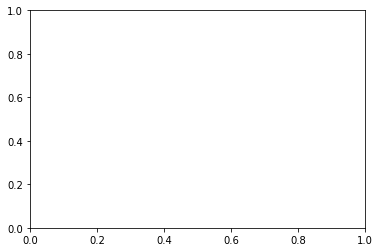

In [143]:
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])

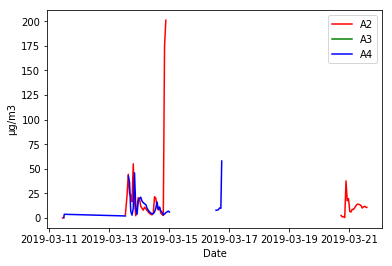

In [146]:
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])
ax.plot(A2_3_4_Costa.Datetime.astype('O') ,A2_3_4_Costa.A2_PM10, color='r',label = 'A2')
ax.plot(A2_3_4_Costa.Datetime.astype('O') ,A2_3_4_Costa.A3_PM10, color='g',label = 'A3')
ax.plot(A2_3_4_Costa.Datetime.astype('O') ,A2_3_4_Costa.A4_PM10, color='b',label = 'A4')
ax.legend(loc = 'best')
ax.set_xlabel('Date')
ax.set_ylabel('μg/m3')
plt.show()

In [147]:
fig.savefig('A2A3A4_costaRica.png')

## Other sensors which have calibration

In [8]:
Arduino6 = pd.read_csv("After Calibration/cr_sensor_6_calib.txt",delimiter=',',
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','Temp', 'Pressure', 'Humidity', 'VOC'
                              ,'SO2_1','SO2_2','NO2_1','NO2_2'])

In [16]:
Arduino6

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2,Datetime
0,2019,3,11,13,27,3,22.15,1026.28,24.42,0.00,32767.00,32767.00,-3887.0,-4567.00,2019-03-11 13:27:03
1,2019,3,11,13,27,8,22.16,1026.26,24.28,6.14,32767.00,32767.00,-2194.0,-4298.00,2019-03-11 13:27:08
2,2019,3,11,13,27,13,22.18,1026.26,24.07,8.81,32767.00,32767.00,-1972.0,-3881.00,2019-03-11 13:27:13
3,2019,3,11,13,27,18,22.20,1026.26,23.87,11.67,32767.00,32767.00,-1877.0,-3160.00,2019-03-11 13:27:18
4,2019,3,11,13,27,23,22.22,1026.28,23.77,14.51,32767.00,32767.00,-1816.0,-2666.00,2019-03-11 13:27:23
5,2019,3,11,13,27,28,22.23,1026.28,23.84,17.64,32767.00,32767.00,-1775.0,-2255.00,2019-03-11 13:27:28
6,2019,3,11,13,27,33,22.25,1026.28,23.84,20.84,32767.00,32767.00,-2079.0,-4498.00,2019-03-11 13:27:33
7,2019,3,11,13,27,38,22.27,1026.30,23.82,23.95,24157.00,32767.00,-2009.0,-4256.00,2019-03-11 13:27:38
8,2019,3,11,13,27,43,22.28,1026.28,23.80,26.96,13932.00,32767.00,-1956.0,-3991.00,2019-03-11 13:27:43
9,2019,3,11,13,27,48,22.30,1026.30,23.67,30.21,7423.00,32767.00,-1906.0,-3748.00,2019-03-11 13:27:48


In [15]:
Arduino6['Datetime']  = (pd.to_datetime(Arduino6['Year'].astype(str) + '-' +
                                  Arduino6['Month'].astype(str) + '-' +
                                  Arduino6['Day'].astype(str) + ' ' +
                                  Arduino6['Hour'].astype(str)+ ':'+
                                        Arduino6['Minute'].astype(str) +':'+
                                        Arduino6['Seconds'].astype(str)))

In [ ]:
#Aux V = SO2_1
# Use the offset value which is found through the calibration of the
# arduino at the monitoring site Bruce said that this was 0.26 from 
#looking at the data but doesn't make sense as how do i include 
#data from marylebone actual equipment?!

Arduino6['aux-off V'] = ['SO2_1'- offset]

In [ ]:
#Create a new variable for the voltage reading. Calculate the variable 
#through subtracting the adjusted baseline value from the measurement value

Arduino6['V reading'] = ['SO2_2'- 'aux-off V']

In [ ]:
#Convert the voltage reading into ppb using the WE sensitivity values 
#provided by the manufacturer, in this case it's 0.3
#Arduino6['ppb'] = ['V reading'*1000/ sensitivity]

Arduino6['ppb'] = ['V reading'*1000/ 0.3]

In [10]:
# Calculate the offset using the calibration data 
# Subset the data into costa rica and calibration 
A6_Costa = Arduino6[Arduino6.Month <4]
A6_Calib = Arduino6[Arduino6.Month == 4]


In [11]:
A6_Calib

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2
29967,2019,4,10,9,57,51,14.06,1017.46,44.21,0.00,2.05,2.05,1.43,1.32
29968,2019,4,10,9,57,56,13.97,1017.44,44.32,5.86,2.05,2.05,0.99,0.73
29969,2019,4,10,9,58,1,13.86,1017.40,44.28,7.50,2.05,2.05,0.74,0.52
29970,2019,4,10,9,58,6,13.75,1017.38,44.48,9.53,2.05,2.05,0.60,0.44
29971,2019,4,10,9,58,12,13.65,1017.34,44.70,11.68,2.05,2.05,0.51,0.41
29972,2019,4,10,9,58,17,13.53,1017.34,44.88,13.95,2.05,2.05,0.46,0.39
29973,2019,4,10,9,58,22,13.41,1017.34,45.02,16.31,2.05,2.05,0.43,0.38
29974,2019,4,10,9,58,27,13.28,1017.32,45.15,18.87,2.05,2.05,0.41,0.38
29975,2019,4,10,9,58,32,13.14,1017.32,45.37,21.43,2.05,2.05,0.40,0.38
29976,2019,4,10,9,58,37,13.00,1017.26,45.77,24.19,2.05,2.05,0.39,0.38


In [12]:
A6_Costa

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2
0,2019,3,11,13,27,3,22.15,1026.28,24.42,0.00,32767.00,32767.00,-3887.00,-4567.00
1,2019,3,11,13,27,8,22.16,1026.26,24.28,6.14,32767.00,32767.00,-2194.00,-4298.00
2,2019,3,11,13,27,13,22.18,1026.26,24.07,8.81,32767.00,32767.00,-1972.00,-3881.00
3,2019,3,11,13,27,18,22.20,1026.26,23.87,11.67,32767.00,32767.00,-1877.00,-3160.00
4,2019,3,11,13,27,23,22.22,1026.28,23.77,14.51,32767.00,32767.00,-1816.00,-2666.00
5,2019,3,11,13,27,28,22.23,1026.28,23.84,17.64,32767.00,32767.00,-1775.00,-2255.00
6,2019,3,11,13,27,33,22.25,1026.28,23.84,20.84,32767.00,32767.00,-2079.00,-4498.00
7,2019,3,11,13,27,38,22.27,1026.30,23.82,23.95,24157.00,32767.00,-2009.00,-4256.00
8,2019,3,11,13,27,43,22.28,1026.28,23.80,26.96,13932.00,32767.00,-1956.00,-3991.00
9,2019,3,11,13,27,48,22.30,1026.30,23.67,30.21,7423.00,32767.00,-1906.00,-3748.00


In [ ]:
# Plot data
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])
ax.plot(Arduino6.Datetime.astype('O') ,Arduino6.ppb, color='b',label = 'SO2')


In [5]:
Arduino6.to_csv('Ard6.csv')

In [20]:
Arduino9 = pd.read_csv("After Calibration/cr_sensor_9_calib.txt",delimiter=',',
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','CO2','?'])

In [21]:
Arduino9

,Year,Month,Day,Hour,Minute,Seconds,CO2,?
0,2019,3,11,15,4,30,0.61,648.44
1,2019,3,11,15,4,35,0.61,657.42
2,2019,3,11,15,4,40,0.61,651.56
3,2019,3,11,15,4,45,0.61,659.96
4,2019,3,11,15,4,50,0.62,673.44
5,2019,3,11,15,4,57,0.62,691.41
6,2019,3,11,15,5,2,0.62,698.44
7,2019,3,11,15,5,11,0.62,690.63
8,2019,3,13,13,9,46,1.23,2602.93
9,2019,3,13,13,9,51,1.33,2920.12


In [7]:
Arduino10 = pd.read_csv("After Calibration/cr_sensor_10_calib.txt",delimiter=',',
                        names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','CO_1','CO_2','NO2_1','NO2_2'])

In [23]:
Arduino10

,Year,Month,Day,Hour,Minute,Seconds,V0,V1,V2,V3
0,2019,11,3,15,14,29,0.27,0.28,0.29,0.29
1,2019,11,3,15,14,34,0.27,0.28,0.29,0.30
2,1900,1,1,0,0,7,0.04,0.28,0.04,0.00
3,1900,1,1,0,0,12,0.04,0.28,0.04,-0.00
4,1900,1,1,0,0,6,0.04,0.28,0.04,-0.00
5,1900,1,1,0,0,11,0.04,0.28,0.04,-0.00
6,1900,1,1,0,0,16,0.04,0.28,0.15,0.08
7,1900,1,1,0,0,21,0.04,0.28,0.20,0.10
8,1900,1,1,0,0,26,0.04,0.28,0.22,0.17
9,1900,1,1,0,0,31,0.04,0.28,0.24,0.18
